In [1]:
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph
%matplotlib notebook

<IPython.core.display.Javascript object>


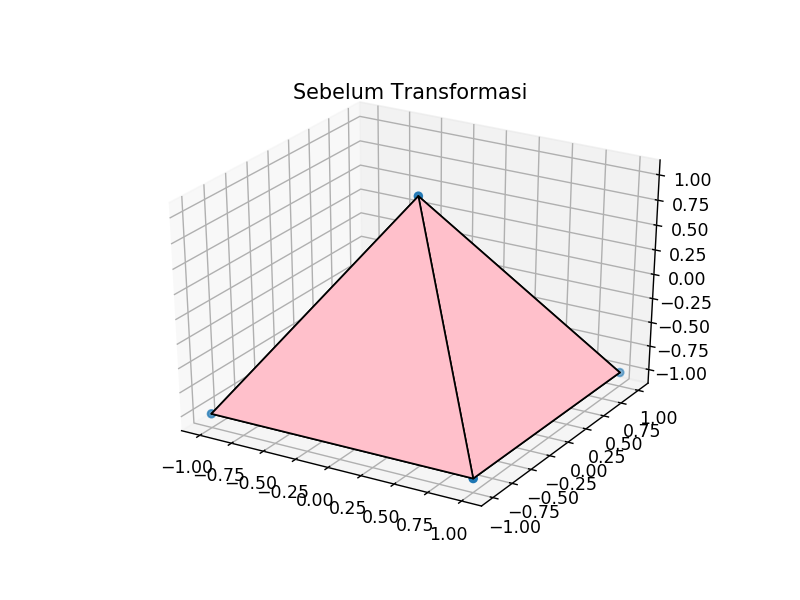

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Membuat titik titik bangun limas
limas = np.array([[-1, -1, -1],
                  [1, -1, -1],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [0, 0, 1]])

# Memploting titik limas saya menggunakan scatter3D
# parameternya membuatuhkan koordinat x, y, z 
# dimana x, y, z tersebut didapat dari kolom kolom matriks limas 
ax.scatter3D(limas[:, 0], limas[:, 1], limas[:, 2])

# Untuk membuat sisinya dengan mengkombinasikan titik titik dari limas tersebut
# Jadi ada 4 sisi yang mempunyai 3 titik dan 1 sisi atau alas mempunyai 4 titik
verts = [ [limas[0],limas[1],limas[4]],
          [limas[0],limas[3],limas[4]],
          [limas[2],limas[1],limas[4]],
          [limas[2],limas[3],limas[4]], 
          [limas[0],limas[1],limas[2],limas[3]]]

# Memploting sisi limas menggunakan Poly3DCollection
ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black'))
plt.title('Sebelum Transformasi')
plt.savefig('limas.png')
plt.show()


In [ ]:
##### Axis/angle #####
Rotasi dapat direpresentasikan dengan sumbu rotasi n^ dan sudut θ
Untuk menggunakan metode ini sudah pasti membutuhkan n^ dan θ, dimana 
n^ merupakan vektor-3 acak yang terdiri dari nx, ny dan nz dan θ 
sebagai besar sudut rotasi dalam satuan radian. vektor n^ merupakan
titik di ruang 3 dimensi. jadi vektor n^ adalah vektor yang di mulai 
dari 0, 0, 0 yang mencuat menuju nx, ny, nz.
dari vektor n^ kita bisa hitung besar (magnitudo) vektor. 
untuk menghitung magnitudo, saya menggunakan np.linalg.norm.

```
formula rodriguez
R(n̂, theta) = I + sin(theta)[n^]x + (1-cos(theta))([n^]x)^2

I = matriks identitas 3x3

[n^]x, matriks 3x3 yang dibentuk oleh n̂

[n^]x = [[  0, -nz,  ny],
         [ nz,   0, -nx],
         [-ny,  nx,   0]]

([n^]x)^2, matriks [n^]x yang dikali matriks dengan dirinya sendiri
```

In [4]:
def rodriguez_formula (mat, n_topi, theta):
    # kita pisah komponen yang berada di n_topi, untuk membentuk [n^]x
    nx, ny, nz = n_topi
    ntopi_x = np.array([[ 0 , -nz,  ny],
                        [ nz,   0, -nx],
                        [-ny,  nx,   0]])
    # Matriks identitas 3x3
    I = np.eye(3)
    
    sin = np.sin(theta)
    cos = np.cos(theta)
    
    # Membuat matriks rodriquez dengan mengikuti rumusnya
    # R(n̂, theta) = I + sin(theta)[n^]x + (1-cos(theta))([n^]x)^2
    rodri_mat = I + (sin*ntopi_x) + ((1-cos)*(ntopi_x@ntopi_x))
    
    baris, kolom = mat.shape
    
    hasil = np.array([])
    
    for row in mat:
        output_row = rodri_mat@row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(baris, kolom))

In [5]:
# Dikarenakan n^ itu bebas, maka dari itu kita membuat sebuah percobaan
# Pertama kita coba jika magnitudo n^ kurang dari 1 
n_topi1 = np.array ([0.1,0,0])
np.linalg.norm(n_topi1)

0.1

<IPython.core.display.Javascript object>


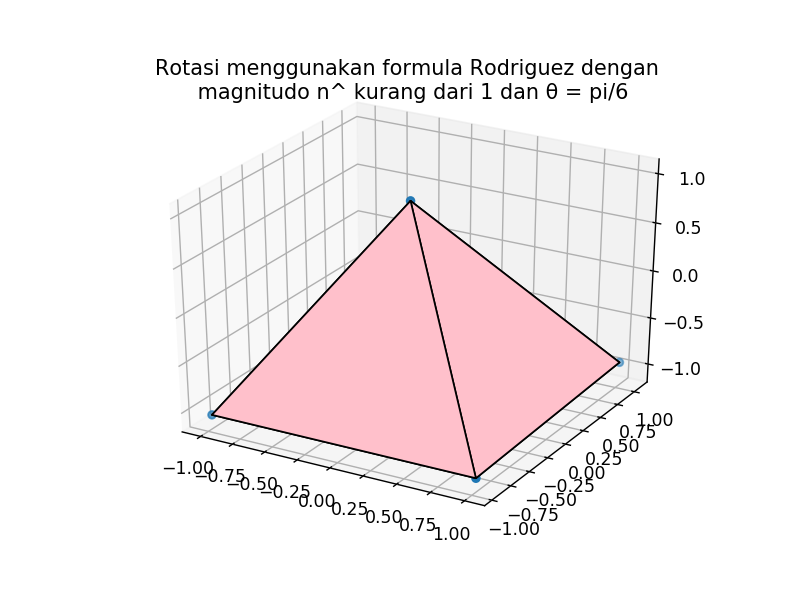

In [17]:
# Membuat tranformasi dengan merotasi bidang limas tersebut dengan
# sumbu rotasi berada pada koordinat (1,0,0) dan sudut sebesar 30 derajat
limrodri = rodriguez_formula(limas, n_topi1, np.pi/6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(limrodri[:, 0], limrodri[:, 1], limrodri[:, 2])
verts = [[limrodri[0],limrodri[1],limrodri[4]],
         [limrodri[0],limrodri[3],limrodri[4]],
         [limrodri[2],limrodri[1],limrodri[4]],
         [limrodri[2],limrodri[3],limrodri[4]],
         [limrodri[0],limrodri[1],limrodri[2],limrodri[3]]]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black'))

plt.title('Rotasi menggunakan formula Rodriguez dengan \n magnitudo n^ kurang dari 1 dan θ = pi/6')
plt.savefig('limas_rodri_n_topi1.png')
plt.show()

In [ ]:
Yang terjadi adalah rotasi hanya bergerak sedikit, tidak seperti apa yang saya bayangkan 

In [7]:
# Kedua kita coba jika magnitudo n̂ lebih dari 1 
n_topi2 = np.array ([4,5,4])
np.linalg.norm(n_topi2)

7.54983443527075

<IPython.core.display.Javascript object>


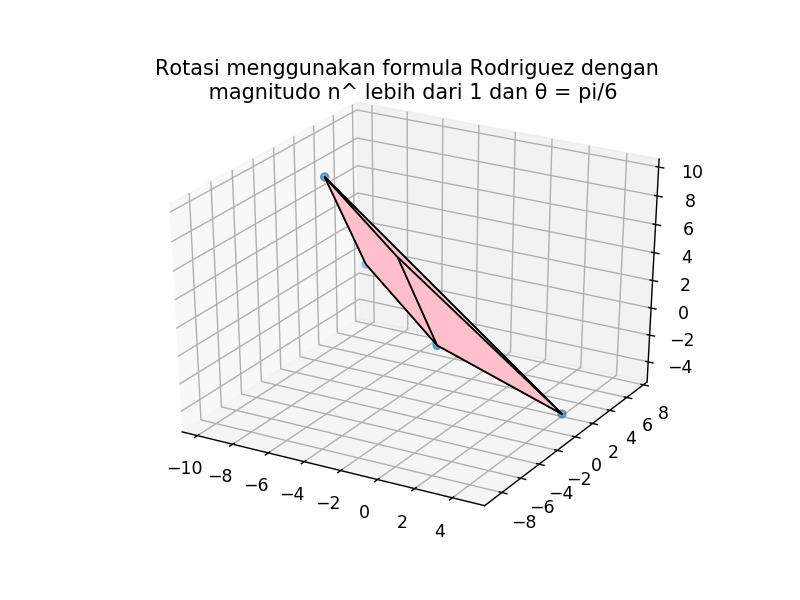

In [18]:
limrodri = rodriguez_formula(limas, n_topi2, np.pi/6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(limrodri[:, 0], limrodri[:, 1], limrodri[:, 2])
verts = [[limrodri[0],limrodri[1],limrodri[4]],
         [limrodri[0],limrodri[3],limrodri[4]],
         [limrodri[2],limrodri[1],limrodri[4]],
         [limrodri[2],limrodri[3],limrodri[4]],
         [limrodri[0],limrodri[1],limrodri[2],limrodri[3]]]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black'))
plt.title('Rotasi menggunakan formula Rodriguez dengan \n magnitudo n^ lebih dari 1 dan θ = pi/6')
plt.savefig('limas_rodri_n_topi2.png')
plt.show()

In [ ]:
Jika magnitudo n̂ lebih dari 1 maka yang terjadi adalah bentuk limas akan menjadi pipih

In [13]:
# Ketiga kita coba jika magnitudo n̂ samadengan 1
n_topi = np.array ([1,0,0])
mg = np.linalg.norm(n_topi)
# Untuk lebih mudah supaya magnitudenya = 1 
# maka komponen n_topi kita kali dengan 1/(magnitude keluaran)
n_topi = (1/mg)*n_topi
print(np.linalg.norm(n_topi))

1.0


<IPython.core.display.Javascript object>


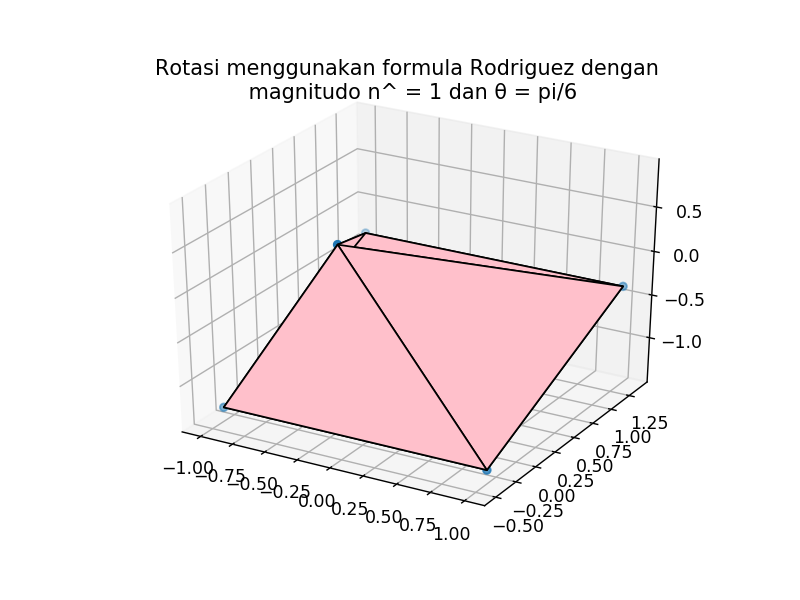

In [19]:
limrodri = rodriguez_formula(limas, n_topi, np.pi/6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(limrodri[:, 0], limrodri[:, 1], limrodri[:, 2])
verts = [[limrodri[0],limrodri[1],limrodri[4]],
         [limrodri[0],limrodri[3],limrodri[4]],
         [limrodri[2],limrodri[1],limrodri[4]],
         [limrodri[2],limrodri[3],limrodri[4]],
         [limrodri[0],limrodri[1],limrodri[2],limrodri[3]]]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black'))

plt.title('Rotasi menggunakan formula Rodriguez dengan \n magnitudo n^ = 1 dan θ = pi/6')
plt.savefig('limas_rodri_n_topi.png')
plt.show()

In [ ]:
Dengan magnitudo = 1, bentuk dan ukuran limas tetap seperti awal tidak ada yang berubah dan 
rotasi nya menjadi sesuai dengan besar theta

In [ ]:
##### Unit quaternions #####
Quaternions dapat diturunkan dari representasi axis/angle
q = (v,w) = ((sin(θ/2)*n̂), cos(θ/2), dimana  nˆ dan θ sumbu dan sudut rotasi. menggunakan identitas trigonometri sinθ = 2sin(θ/2)cos(θ/2)
dan (1-cosθ) = 2sin^2(θ/2)
formula rodriguez dapat kita konversi menjadi:
```
R(n̂, θ) = I + sin(θ)[n^]x + (1-cos(θ))([n^]x)^2
         = I + 2w[v]x + 2([v]x)^2
matriks [v]x yang berukuran 3x3
[v]x = [[ 0, -z,  y],
        [ z,  0, -x],
        [-y,  x,  0]]
matriks ([v]x)^2 adalah matriks [v]x yang berukuran 3x3 yang dikali matriks dengan dirinya sendiri
```

In [15]:
def quaternions(mat, v, w):
    x, y, z = v
    v_x = np.array([[ 0, -z,  y],
                    [ z,  0, -x],
                    [-y,  x,  0]])
    I = np.eye(3)
    quaternions_mat = I + (2*w*v_x) + (2*(v_x@v_x))
    
    rowInput,colInput = mat.shape
    
    hasil = np.array([])
    for row in mat:
        output_row = quaternions_mat@row
        hasil = np.append(hasil, output_row, axis = 0)
    
    return np.reshape(hasil,(rowInput,colInput))

In [16]:
# Rotasi sebesar 30 derajat
theta = np.pi/6
v = (np.sin(theta/2)) * n_topi
w = np.cos(theta/2)

<IPython.core.display.Javascript object>


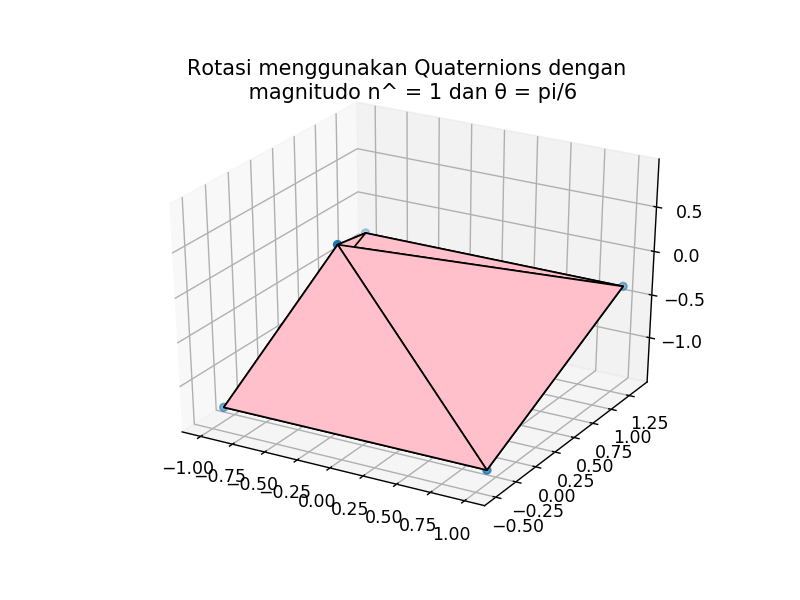

In [20]:
# Membuat tranformasi dengan menggunakan metode quaternions 
limrot = quaternions(limas,v,w)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(limrot[:, 0], limrot[:, 1], limrot[:, 2])
verts = [[limrot[0],limrot[1],limrot[4]],
         [limrot[0],limrot[3],limrot[4]],
         [limrot[2],limrot[1],limrot[4]],
         [limrot[2],limrot[3],limrot[4]],
         [limrot[0],limrot[1],limrot[2],limrot[3]]]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='pink', linewidths=1, edgecolors='black', alpha=.25))

plt.title('Rotasi menggunakan Quaternions dengan \n magnitudo n^ = 1 dan θ = pi/6')
plt.savefig('limas_quarternions.png')
plt.show()